## Hierarchical Clustering

Импортируем библиотеки и наш датасет.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('University_prep.csv', sep=';')
df

,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Citations,GDP,Industry_Income
0,20664.0,11.2,8472.0,0.46,0.54,90.5,98.4,41627.0,65.5
1,2240.0,6.4,672.0,0.34,0.66,92.1,97.9,60236.0,88.0
2,18978.0,10.9,7022.0,0.47,0.53,91.4,95.8,41627.0,59.3
3,16135.0,7.3,3711.0,0.43,0.57,92.8,99.9,60236.0,66.2
4,11247.0,8.6,3824.0,0.39,0.61,90.5,99.5,60236.0,86.9
...,...,...,...,...,...,...,...,...,...
1351,20174.0,17.8,0.0,0.55,0.45,16.2,6.1,14064.0,35.6
1352,34101.0,21.3,0.0,0.57,0.43,15.3,6.7,14064.0,35.1
1353,15236.0,11.1,3.0,0.63,0.37,17.0,4.5,28053.0,36.9
1354,17101.0,24.9,0.0,0.54,0.46,13.8,7.6,14064.0,35.0


Прошкалируем наши данные.

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['Number_students','Numb_students_per_Staff','International_Students','Percentage_Female','Percentage_Male','Teaching','Citations','GDP','Industry_Income']).round()

Выводим корреляционную матрицу. Она нам пригодится позже для выявления переменных, которые оставим для кластеризации.

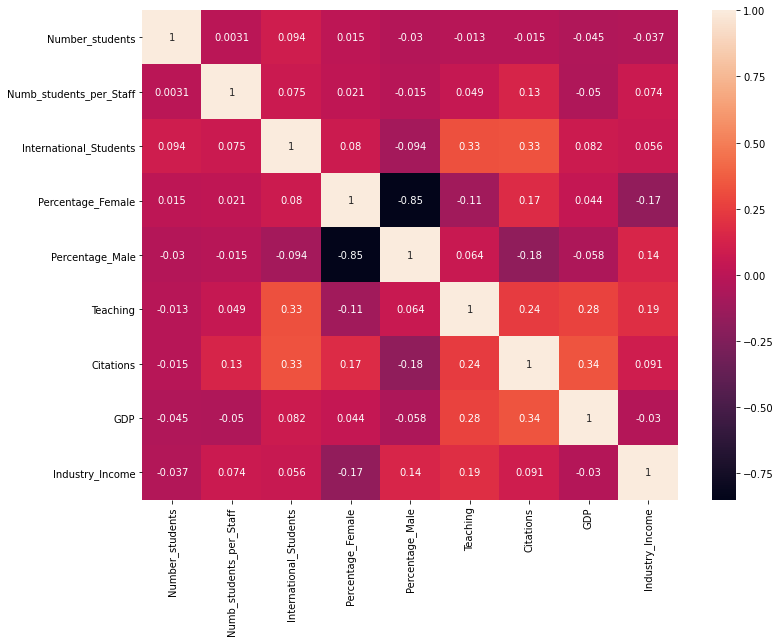

In [4]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Для определения оптимального количества кластеров построим дендрограмму. Чтобы сделать разделение более интересным для интерпретации, принимаем решение, что будет делать разбиение на 5 кластера.

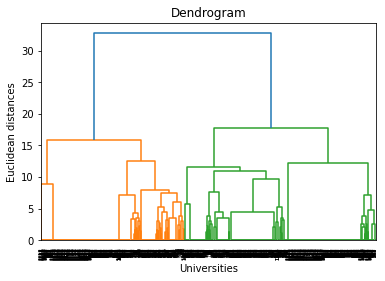

In [5]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Universities')
plt.ylabel('Euclidean distances')
plt.show()

In [6]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit_predict(df)
hc

array([3, 3, 3, ..., 0, 0, 1], dtype=int64)

Уменьшим количество переменных, оставив только значимые. Отталкиваемся от корреляционной матрицы и значимых переменных, которые использовались при исследовании ранее. Таким образом, оставляем Percentage_Female,Citations и GDP.

In [7]:
X = df.iloc[:, [3,6,7]]

Теперь строим дендрограмму с использованием только значимых переменных.

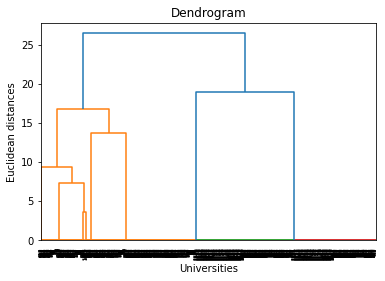

In [8]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Universities')
plt.ylabel('Euclidean distances')
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

Консервируем результат.

In [10]:
import pickle
obj = {'hc': hc}
output = open('clust.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()